In [52]:
%load_ext autoreload
%autoreload 2

import casadi as ca
import matplotlib.pyplot as plt 
from autodiff_sys import Sys
from helper_fns import *
k0 = ca.MX.sym('k0')
m1 = ca.MX.sym('m1')
b1 = ca.MX.sym('b1')
k1 = ca.MX.sym('k1')
m2 = ca.MX.sym('m2')
b2 = ca.MX.sym('b2')
k2 = ca.MX.sym('k2')
p = [k0, m1, b1, k1, m2, b2, k2]
Gk0 = Sys([k0],[1])
Gm1 = Sys([1],[m1, 0, 0])
Gbk1 = Sys([b1, k1], [1])
Gk1 = Sys([k1],[1])
Gm2 = Sys([1],[m2, 0, 0])
Gbk2 = Sys([b2, k2], [1])
Gmbk2 = Gm2/(1+Gm2*Gbk2)
Gmbk2bk1 = Gbk1/(1+Gbk1*Gmbk2)
G_x_to_f = Gk1/(1+Gk1*Gmbk2)    # From q1 to force
G_u_to_x = Gm1/(1+Gm1*Gmbk2bk1) # From \tau_m to force
G_x_to_f2 = Gk0/(1+Gk0*G_u_to_x)
        
print(G_x_to_f)
A, B, C = tf2ss(G_u_to_x.num, G_u_to_x.den)
print(A)
print(B)
print(C)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num: [MX((k1*sq(m2))), MX((k1*(m2*b2))), MX((k1*(m2*k2))), MX(0), MX(0)] den: [MX(sq(m2)), MX((m2*b2)), MX(((m2*k2)+(k1*m2))), MX(0), MX(0)]
Cancelling pole/zero at 0
Cancelling pole/zero at 0
Cancelling pole/zero at 0
Cancelling pole/zero at 0
@1=(m2*k2), @2=sq(m2), @3=(m1*(m1*@2)), @4=(m2*b2), ((((horzcat(horzcat(zeros(3x1), ones(3x3,3nz))', zeros(4x1))'[3] = (-((m1*(k1*@1))/@3)))[5] = (-((m1*((b1*@1)+(k1*@4)))/@3)))[7] = (-((m1*((m1*(@1+(k1*m2)))+((b1*@4)+(k1*@2))))/@3)))[9] = (-((m1*((m1*(@4+(b1*m2)))+(b1*@2)))/@3)))
(zeros(4x1)[3] = 1)
@1=(m1*sq(m2)), @2=(m1*@1), ((((zeros(1x4)[0] = ((m1*((m2*k2)+(k1*m2)))/@2))[1] = ((m1*((m2*b2)+(b1*m2)))/@2))[2] = (@1/@2))[3] = 0)


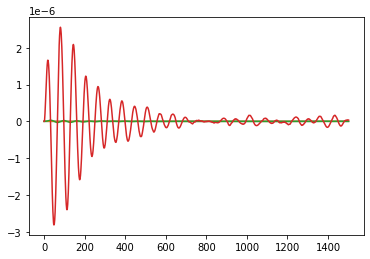

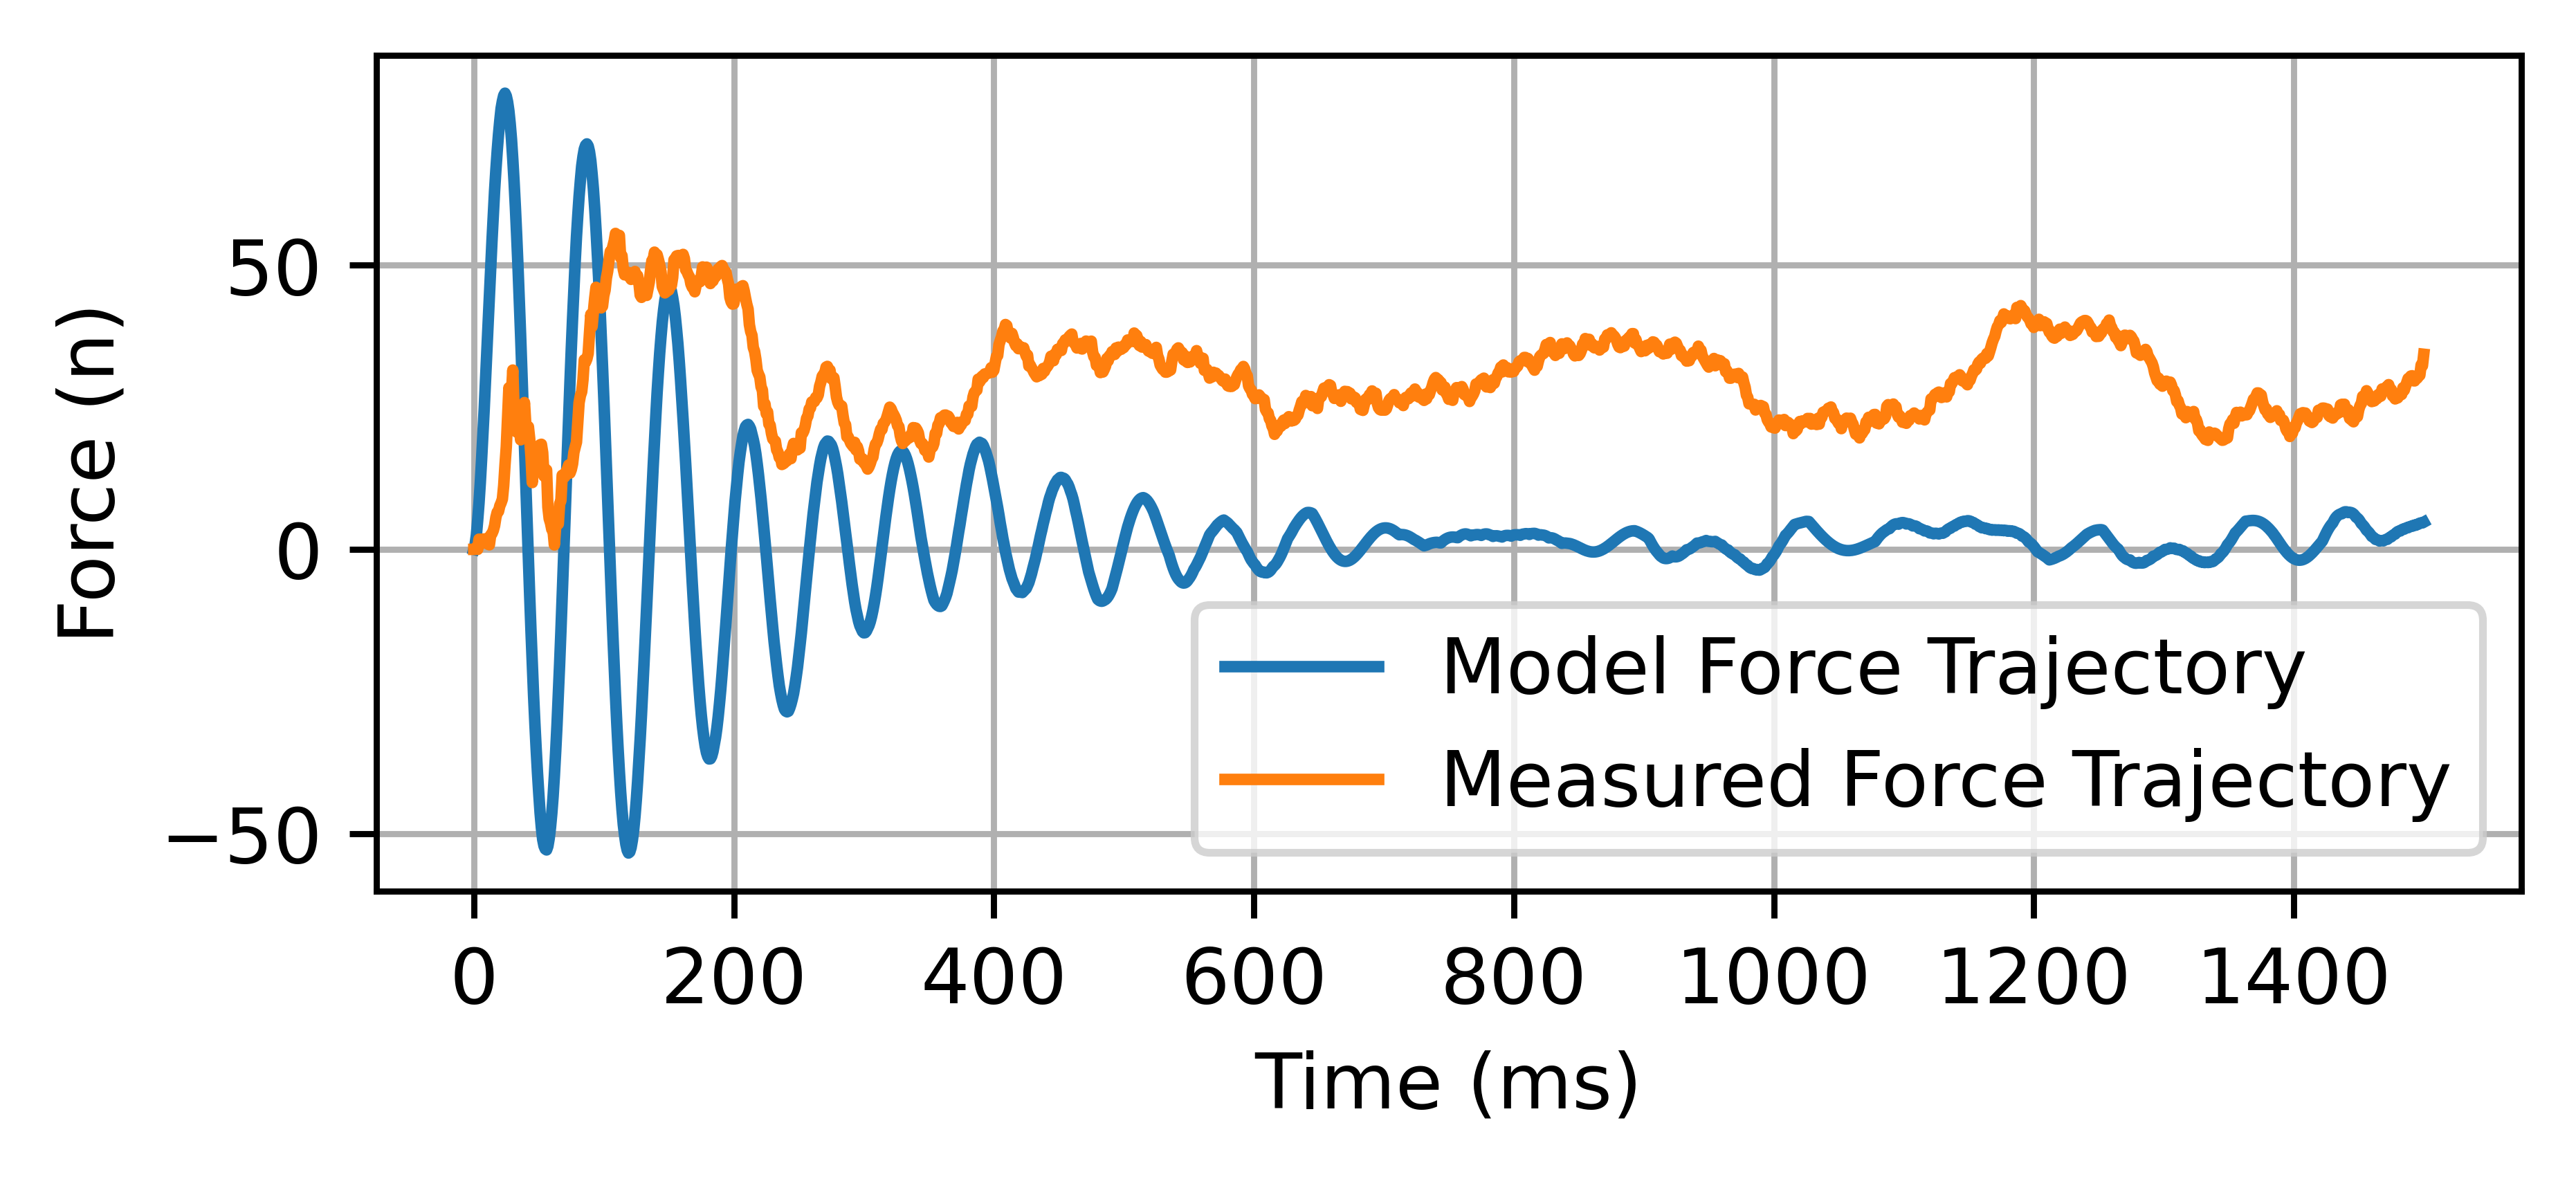

In [25]:
#         K0,           m1,  b1,          k1,         m2,          b2,      k2
#p0 = [17434.3, 8.76996e-1, 3.46538e+6, 0.542849, 3.75313e+6, 5.22035e+6, 7.67087]
#p0 = [26571.5, 12.1303, 150.895, 52286.7, 6.811e+07, 3.30407e+09, 1.15195e+12]
#u, ym = import_csv('data/yellow_feet_coll.csv')

x0 = ca.MX.zeros(4,1)

#p0 = [9.89975e+14, 9.89975e+14, 9.89975e+14, 174457.9, 20.03817, 305.8104, 2629.28]
#x0[0] = -3e-8
#u, ym = import_csv('data/flex_jt_imco.csv')

p0 = [180280.5, 16.936, 596.4, 493.7, 26.657, 2000, 179200]
u, ym = import_csv('data/yellow_feet_imco.csv')

#p0 = [1.47727e+08, 1.47727e+08, 1.41505e+10, 13615.3, 63.9755, 1866.55, 7347.23]
#u, ym = import_csv('data/yellow_surf_imco.csv')

y, x_traj = G_x_to_f2.simulate(u, x0, dt=0.001)

y_eval = ca.Function('y_eval', p,y)
x_eval = ca.Function('x_eval', p,x_traj)
y_num = y_eval(*p0)
x_traj_num = x_eval(*p0)
x_traj_num = [np.squeeze(x_tr.full()) for x_tr in x_traj_num]
plt.figure()
plt.plot(x_traj_num)
plt.show()
plt.figure(figsize=(5,2), dpi = 800)
plt.plot(y_num, label='Model Force Trajectory')
plt.plot(ym, label = 'Measured Force Trajectory')
plt.xlabel('Time (ms)')
plt.ylabel('Force (n)')
plt.grid(True)
plt.legend()
plt.show()

Cancelling pole/zero at 0
Cancelling pole/zero at 0
Cancelling pole/zero at 0
Cancelling pole/zero at 0
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        7
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper b

CasADi - 2021-09-11 17:05:40 WARNING("solver:nlp_f failed: Inf detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


  11  7.0651028e+04 0.00e+00 2.31e+00  -2.5 5.04e+02  -5.0 1.00e+00 5.00e-01f  2
  12  7.0160590e+04 0.00e+00 3.59e-01  -2.5 2.93e+02  -5.4 1.00e+00 1.00e+00f  1
  13  7.0029928e+04 0.00e+00 9.35e-01  -2.5 9.14e+02  -5.9 1.00e+00 2.50e-01f  3
  14  6.9779743e+04 0.00e+00 1.53e+00  -2.5 1.60e+03  -6.4 1.00e+00 5.00e-01f  2
  15  6.9701502e+04 0.00e+00 1.40e+00  -2.5 1.64e+02  -5.1 1.00e+00 1.00e+00f  1
  16  6.9613068e+04 0.00e+00 4.61e-02  -2.5 1.56e+02  -5.5 1.00e+00 1.00e+00f  1
  17  6.9558727e+04 0.00e+00 4.12e+00  -2.5 4.49e+02  -6.0 1.00e+00 1.00e+00f  1
  18  6.9439978e+04 0.00e+00 1.80e-01  -2.5 1.43e+02  -5.6 1.00e+00 1.00e+00f  1
  19  6.9411500e+04 0.00e+00 4.74e+00  -2.5 4.26e+02  -6.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  6.9329755e+04 0.00e+00 2.06e-01  -2.5 1.25e+02  -5.6 1.00e+00 1.00e+00f  1
  21  6.9294744e+04 0.00e+00 3.74e+00  -2.5 3.72e+02  -6.1 1.00e+00 1.00e+00f  1
  22  6.9255719e+04 0.00e+00

 105  6.8867628e+04 0.00e+00 1.11e+00  -3.8 3.44e+01  -6.5 1.00e+00 1.00e+00f  1
 106  6.8866692e+04 0.00e+00 2.32e+00  -3.8 1.03e+02  -6.9 1.00e+00 1.00e+00f  1
 107  6.8866648e+04 0.00e+00 8.91e+00  -3.8 5.46e+01  -6.5 1.00e+00 1.00e+00f  1
 108  6.8866074e+04 0.00e+00 3.07e-01  -3.8 1.76e+01  -6.1 1.00e+00 1.00e+00f  1
 109  6.8865697e+04 0.00e+00 1.37e-01  -3.8 4.02e+01  -6.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  6.8864620e+04 0.00e+00 1.48e-01  -3.8 1.17e+02  -7.0 1.00e+00 1.00e+00f  1
 111  6.8862227e+04 0.00e+00 8.61e+00  -3.8 3.27e+02  -7.5 1.00e+00 1.00e+00f  1
 112  6.8861627e+04 0.00e+00 3.84e-01  -3.8 2.12e+01  -6.2 1.00e+00 1.00e+00f  1
 113  6.8861251e+04 0.00e+00 8.06e-02  -3.8 4.48e+01  -6.7 1.00e+00 1.00e+00f  1
 114  6.8860185e+04 0.00e+00 5.38e-01  -3.8 1.30e+02  -7.1 1.00e+00 1.00e+00f  1
 115  6.8859798e+04 0.00e+00 2.70e+00  -3.8 5.43e+02  -7.6 1.00e+00 1.25e-01f  4
 116  6.8859225e+04 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  6.8831062e+04 0.00e+00 4.07e+00  -5.7 4.84e+02  -8.4 1.00e+00 1.00e+00f  1
 201  6.8830702e+04 0.00e+00 8.55e-01  -5.7 7.98e+01  -7.1 1.00e+00 1.00e+00f  1
 202  6.8830670e+04 0.00e+00 1.25e-01  -5.7 9.63e+00  -6.7 1.00e+00 1.00e+00f  1
 203  6.8830624e+04 0.00e+00 1.02e-02  -5.7 2.49e+01  -7.2 1.00e+00 1.00e+00f  1
 204  6.8830489e+04 0.00e+00 5.30e-02  -5.7 7.34e+01  -7.6 1.00e+00 1.00e+00f  1
 205  6.8830121e+04 0.00e+00 1.87e-01  -5.7 2.07e+02  -8.1 1.00e+00 1.00e+00f  1
 206  6.8830042e+04 0.00e+00 3.04e+00  -5.7 7.44e+02  -8.6 1.00e+00 2.50e-01f  3
 207  6.8829795e+04 0.00e+00 1.18e+00  -5.7 1.04e+02  -7.3 1.00e+00 1.00e+00f  1
 208  6.8829773e+04 0.00e+00 6.09e-01  -5.7 6.33e+01  -6.8 1.00e+00 5.00e-01f  2
 209  6.8829702e+04 0.00e+00 8.15e-02  -5.7 3.07e+01  -7.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  6.8829557e+04 0.00e+00

 294  6.8822764e+04 0.00e+00 1.21e-01  -5.7 8.75e+02  -9.9 1.00e+00 1.00e+00f  1
 295  6.8822762e+04 0.00e+00 2.82e-02  -5.7 4.09e+01  -8.6 1.00e+00 1.00e+00f  1
 296  6.8822756e+04 0.00e+00 2.43e-05  -5.7 1.22e+02  -9.1 1.00e+00 1.00e+00f  1
 297  6.8822740e+04 0.00e+00 5.32e-05  -5.7 3.55e+02  -9.6 1.00e+00 1.00e+00f  1
 298  6.8822700e+04 0.00e+00 1.53e-04  -5.7 9.79e+02 -10.0 1.00e+00 1.00e+00f  1
 299  6.8822614e+04 0.00e+00 1.82e-03  -5.7 2.39e+03 -10.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  6.8822484e+04 0.00e+00 2.47e-02  -5.7 4.72e+03 -11.0 1.00e+00 1.00e+00f  1
 301  6.8822467e+04 0.00e+00 6.98e-01  -5.7 1.74e+03 -10.6 1.00e+00 1.00e+00f  1
 302  6.8822446e+04 0.00e+00 1.44e-02  -5.7 3.32e+00  -6.5 1.00e+00 1.00e+00f  1
 303  6.8822446e+04 0.00e+00 6.30e-04  -5.7 9.96e-01  -7.0 1.00e+00 1.00e+00f  1
 304  6.8822446e+04 0.00e+00 3.80e-04  -5.7 1.46e+00  -7.5 1.00e+00 1.00e+00f  1
 305  6.8822446e+04 0.00e+00

 387  6.8822164e+04 0.00e+00 1.04e-02  -8.6 2.11e+01  -9.2 1.00e+00 1.00e+00f  1
 388  6.8822163e+04 0.00e+00 2.07e-02  -8.6 6.33e+01  -9.6 1.00e+00 1.00e+00f  1
 389  6.8822163e+04 0.00e+00 3.35e-01  -8.6 2.29e+02 -10.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390  6.8822161e+04 0.00e+00 1.17e-01  -8.6 1.08e+01  -7.9 1.00e+00 1.00e+00f  1
 391  6.8822161e+04 0.00e+00 8.56e-03  -8.6 9.65e+00  -8.4 1.00e+00 1.00e+00f  1
 392  6.8822160e+04 0.00e+00 2.65e-03  -8.6 1.04e+01  -8.8 1.00e+00 1.00e+00f  1
 393  6.8822160e+04 0.00e+00 1.85e-04  -8.6 3.18e+01  -9.3 1.00e+00 1.00e+00f  1
 394  6.8822159e+04 0.00e+00 4.25e-03  -8.6 9.64e+01  -9.8 1.00e+00 1.00e+00f  1
 395  6.8822155e+04 0.00e+00 1.27e-01  -8.6 3.03e+02 -10.3 1.00e+00 1.00e+00f  1
 396  6.8822155e+04 0.00e+00 3.26e-02  -8.6 2.54e+01  -8.9 1.00e+00 1.00e+00f  1
 397  6.8822155e+04 0.00e+00 9.51e-02  -8.6 5.26e+01  -9.4 1.00e+00 1.00e+00f  1
 398  6.8822154e+04 0.00e+00

 481  6.8822087e+04 0.00e+00 8.65e-04  -8.6 2.76e+01  -8.9 1.00e+00 1.00e+00f  1
 482  6.8822085e+04 0.00e+00 4.69e-03  -8.6 8.43e+01  -9.3 1.00e+00 1.00e+00f  1
 483  6.8822081e+04 0.00e+00 1.92e-01  -8.6 2.67e+02  -9.8 1.00e+00 1.00e+00f  1
 484  6.8822080e+04 0.00e+00 6.78e-02  -8.6 1.91e+01  -8.5 1.00e+00 1.00e+00f  1
 485  6.8822080e+04 0.00e+00 3.29e-01  -8.6 4.87e+01  -9.0 1.00e+00 1.00e+00f  1
 486  6.8822079e+04 0.00e+00 3.26e-01  -8.6 9.11e+01  -8.5 1.00e+00 5.00e-01f  2
 487  6.8822078e+04 0.00e+00 1.75e-01  -8.6 3.62e+01  -8.1 1.00e+00 5.00e-01f  2
 488  6.8822078e+04 0.00e+00 2.51e-01  -8.6 3.26e+01  -8.6 1.00e+00 1.00e+00f  1
 489  6.8822077e+04 0.00e+00 1.99e-01  -8.6 1.56e+01  -8.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490  6.8822077e+04 0.00e+00 3.41e-02  -8.6 4.79e+01  -8.6 1.00e+00 5.00e-01f  2
 491  6.8822076e+04 0.00e+00 1.63e-01  -8.6 5.96e+01  -9.1 1.00e+00 1.00e+00f  1
 492  6.8822075e+04 0.00e+00

 575  6.8821993e+04 0.00e+00 1.25e-02  -8.6 3.43e+01  -8.6 1.00e+00 1.00e+00f  1
 576  6.8821988e+04 0.00e+00 2.24e-01  -8.6 1.07e+02  -9.0 1.00e+00 1.00e+00f  1
 577  6.8821988e+04 0.00e+00 7.44e-01  -8.6 8.65e+01  -8.6 1.00e+00 5.00e-01f  2
 578  6.8821986e+04 0.00e+00 2.97e-01  -8.6 6.47e+00  -7.3 1.00e+00 1.00e+00f  1
 579  6.8821986e+04 0.00e+00 7.48e-02  -8.6 8.02e+00  -7.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580  6.8821985e+04 0.00e+00 8.09e-02  -8.6 1.79e+01  -8.2 1.00e+00 1.00e+00f  1
 581  6.8821984e+04 0.00e+00 8.47e-01  -8.6 5.99e+01  -8.7 1.00e+00 1.00e+00f  1
 582  6.8821983e+04 0.00e+00 6.51e-01  -8.6 1.13e+01  -7.4 1.00e+00 1.00e+00f  1
 583  6.8821981e+04 0.00e+00 9.34e-02  -8.6 3.70e+01  -7.9 1.00e+00 5.00e-01f  2
 584  6.8821980e+04 0.00e+00 1.30e-01  -8.6 2.39e+01  -8.3 1.00e+00 1.00e+00f  1
 585  6.8821979e+04 0.00e+00 9.00e-01  -8.6 1.06e+02  -8.8 1.00e+00 5.00e-01f  2
 586  6.8821978e+04 0.00e+00

 669  6.8821836e+04 0.00e+00 2.01e-01  -8.6 1.81e+01  -7.3 1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670  6.8821834e+04 0.00e+00 8.79e-01  -8.6 2.01e+01  -7.8 1.00e+00 1.00e+00f  1
 671  6.8821833e+04 0.00e+00 3.04e-02  -8.6 1.55e+01  -7.4 1.00e+00 5.00e-01f  2
 672  6.8821831e+04 0.00e+00 4.90e-01  -8.6 1.92e+01  -7.9 1.00e+00 1.00e+00f  1
 673  6.8821830e+04 0.00e+00 1.29e-01  -8.6 8.25e+00  -7.4 1.00e+00 1.00e+00f  1
 674  6.8821828e+04 0.00e+00 8.38e-01  -8.6 2.42e+01  -7.9 1.00e+00 1.00e+00f  1
 675  6.8821827e+04 0.00e+00 7.07e-01  -8.6 2.59e+01  -7.5 1.00e+00 5.00e-01f  2
 676  6.8821823e+04 0.00e+00 6.08e-01  -8.6 1.80e+03  -8.0 1.00e+00 1.19e-02f  5
 677  6.8821823e+04 0.00e+00 1.04e+00  -8.6 1.54e+01  -7.5 1.00e+00 1.00e+00f  1
 678  6.8821821e+04 0.00e+00 2.20e-01  -8.6 6.44e+00  -7.1 1.00e+00 1.00e+00f  1
 679  6.8821819e+04 0.00e+00 3.60e-02  -8.6 1.11e+01  -7.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 762  6.8821596e+04 0.00e+00 9.19e-02  -8.6 1.88e+01  -7.5 1.00e+00 1.00e+00f  1
 763  6.8821579e+04 0.00e+00 2.81e-01  -8.6 5.94e+01  -7.9 1.00e+00 1.00e+00f  1
 764  6.8821574e+04 0.00e+00 1.25e+00  -8.6 1.04e+03  -8.4 1.00e+00 1.83e-02f  5
 765  6.8821572e+04 0.00e+00 2.17e+00  -8.6 1.29e+01  -7.1 1.00e+00 1.00e+00f  1
 766  6.8821568e+04 0.00e+00 3.63e-01  -8.6 4.92e+00  -6.7 1.00e+00 1.00e+00f  1
 767  6.8821565e+04 0.00e+00 1.85e-01  -8.6 9.63e+00  -7.1 1.00e+00 1.00e+00f  1
 768  6.8821556e+04 0.00e+00 1.16e-01  -8.6 3.03e+01  -7.6 1.00e+00 1.00e+00f  1
 769  6.8821549e+04 0.00e+00 2.08e+00  -8.6 1.09e+02  -8.1 1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770  6.8821546e+04 0.00e+00 5.58e-01  -8.6 6.10e+00  -6.8 1.00e+00 1.00e+00f  1
 771  6.8821542e+04 0.00e+00 2.27e+00  -8.6 1.60e+01  -7.2 1.00e+00 1.00e+00f  1
 772  6.8821540e+04 0.00e+00 2.68e+00  -8.6 1.06e+01  -6.8 1.00e+00 1.00e+00f  1
 773  6.8821536e+04 0.00e+00

 858  6.8820849e+04 0.00e+00 5.03e+00  -8.6 5.68e+01  -7.2 1.00e+00 2.50e-01f  3
 859  6.8820844e+04 0.00e+00 4.01e-02  -8.6 2.23e+00  -5.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860  6.8820834e+04 0.00e+00 1.21e+00  -8.6 6.92e+00  -6.4 1.00e+00 1.00e+00f  1
 861  6.8820808e+04 0.00e+00 4.96e+00  -8.6 2.24e+01  -6.8 1.00e+00 1.00e+00f  1
 862  6.8820801e+04 0.00e+00 1.32e+01  -8.6 1.46e+01  -6.4 1.00e+00 1.00e+00f  1
 863  6.8820776e+04 0.00e+00 3.40e+00  -8.6 6.14e+00  -6.0 1.00e+00 1.00e+00f  1
 864  6.8820763e+04 0.00e+00 9.03e+00  -8.6 1.32e+01  -6.5 1.00e+00 1.00e+00f  1
 865  6.8820748e+04 0.00e+00 1.67e+00  -8.6 5.07e+00  -6.0 1.00e+00 1.00e+00f  1
 866  6.8820731e+04 0.00e+00 5.38e+00  -8.6 1.26e+01  -6.5 1.00e+00 1.00e+00f  1
 867  6.8820721e+04 0.00e+00 8.61e-01  -8.6 4.82e+00  -6.1 1.00e+00 1.00e+00f  1
 868  6.8820701e+04 0.00e+00 4.67e+00  -8.6 1.38e+01  -6.6 1.00e+00 1.00e+00f  1
 869  6.8820691e+04 0.00e+00

 954  6.8812267e+04 0.00e+00 6.34e+01  -8.6 1.67e+01  -5.2 1.00e+00 1.00e+00f  1
 955  6.8811883e+04 0.00e+00 1.01e+01  -8.6 6.90e+00  -4.7 1.00e+00 1.00e+00f  1
 956  6.8810945e+04 0.00e+00 5.20e+02  -8.6 2.66e+01  -5.2 1.00e+00 1.00e+00f  1
 957  6.8810012e+04 0.00e+00 1.24e+01  -8.6 1.53e+00  -3.9 1.00e+00 1.00e+00f  1
 958  6.8809684e+04 0.00e+00 8.22e+00  -8.6 4.15e+00  -4.4 1.00e+00 1.00e+00f  1
 959  6.8808397e+04 0.00e+00 5.81e+01  -8.6 1.47e+01  -4.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 960  6.8807447e+04 0.00e+00 3.76e+02  -8.6 4.04e+02  -5.3 7.04e-01 3.12e-02f  6
 961  6.8806829e+04 0.00e+00 2.87e+01  -8.6 2.87e+00  -4.0 1.00e+00 1.00e+00f  1
 962  6.8805700e+04 0.00e+00 2.71e+01  -8.6 8.88e+00  -4.5 1.00e+00 1.00e+00f  1
 963  6.8796940e+04 0.00e+00 1.52e+03  -8.6 4.77e+01  -4.9 1.00e+00 1.00e+00f  1
 964  6.8793747e+04 0.00e+00 3.20e+02  -8.6 4.57e+00  -3.6 1.00e+00 1.00e+00f  1
 965  6.8786318e+04 0.00e+00

CasADi - 2021-09-11 17:08:21 WARNING("solver:nlp_f failed: Inf detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


 999  5.5152671e+04 0.00e+00 5.49e+07  -8.6 1.28e-01   1.0 1.00e+00 2.50e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000  5.4200934e+04 0.00e+00 3.41e+07  -8.6 1.56e-03   5.9 1.00e+00 1.00e+00f  1
1001  5.1718380e+04 0.00e+00 9.11e+08  -8.6 5.99e-03   5.5 1.00e+00 1.00e+00f  1
1002  5.0513672e+04 0.00e+00 6.95e+08  -8.6 2.61e-03   5.0 1.00e+00 1.00e+00f  1
1003  5.0075132e+04 0.00e+00 1.53e+08  -8.6 4.95e-02   4.5 1.00e+00 6.25e-02f  5
1004  4.9689109e+04 0.00e+00 2.47e+09  -8.6 1.37e-02   4.0 1.00e+00 1.00e+00f  1
1005  4.8990949e+04 0.00e+00 1.07e+09  -8.6 1.27e-03   3.6 1.00e+00 1.00e+00f  1
1006  4.8775329e+04 0.00e+00 1.06e+08  -8.6 3.13e-04   4.9 1.00e+00 1.00e+00f  1
1007  4.8769445e+04 0.00e+00 6.37e+06  -8.6 3.52e-04   4.4 1.00e+00 1.00e+00f  1
1008  4.8768458e+04 0.00e+00 4.48e+06  -8.6 2.41e-04   3.9 1.00e+00 1.00e+00f  1
1009  4.8768382e+04 0.00e+00 4.86e+05  -8.6 7.74e-05   3.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1091  4.8732702e+04 0.00e+00 1.46e+06  -8.6 5.91e+03 -11.7 1.00e+00 1.00e+00f  1
1092  4.8732619e+04 0.00e+00 1.17e+07  -8.6 1.55e+04 -12.2 1.00e+00 5.00e-01f  2
1093  4.8731570e+04 0.00e+00 9.00e+05  -8.6 8.33e+03 -11.8 1.00e+00 1.00e+00f  1
1094  4.8731213e+04 0.00e+00 7.29e+06  -8.6 1.74e+04 -12.3 1.00e+00 2.50e-01f  3
1095  4.8730519e+04 0.00e+00 1.94e+06  -8.6 7.06e+03 -11.8 1.00e+00 1.00e+00f  1
1096  4.8730130e+04 0.00e+00 6.61e+06  -8.6 1.91e+04 -12.3 1.00e+00 5.00e-01f  2
1097  4.8729446e+04 0.00e+00 1.99e+06  -8.6 7.93e+03 -11.9 1.00e+00 1.00e+00f  1
1098  4.8729022e+04 0.00e+00 5.36e+06  -8.6 2.21e+04 -12.4 1.00e+00 5.00e-01f  2
1099  4.8728383e+04 0.00e+00 2.43e+06  -8.6 8.50e+03 -11.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100  4.8728208e+04 0.00e+00 9.77e+06  -8.6 2.82e+04 -12.4 1.00e+00 1.00e+00f  1
1101  4.8727044e+04 0.00e+00 3.13e+05  -8.6 2.07e+04 -12.0 1.00e+00 1.00e+00f  1
1102  4.8726639e+04 0.00e+00

1184  4.8663434e+04 0.00e+00 3.43e+05  -8.6 8.52e+01  -9.7 1.00e+00 1.00e+00f  1
1185  4.8662316e+04 0.00e+00 6.38e+05  -8.6 2.46e+02 -10.1 1.00e+00 1.00e+00f  1
1186  4.8660662e+04 0.00e+00 1.87e+05  -8.6 6.10e+02 -10.6 1.00e+00 1.00e+00f  1
1187  4.8659694e+04 0.00e+00 5.34e+05  -8.6 1.87e+03 -11.1 1.00e+00 5.00e-01f  2
1188  4.8658068e+04 0.00e+00 2.23e+05  -8.6 2.02e+03 -11.6 1.00e+00 1.00e+00f  1
1189  4.8657034e+04 0.00e+00 3.85e+05  -8.6 5.09e+03 -12.1 1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190  4.8655484e+04 0.00e+00 3.49e+05  -8.6 1.41e+04 -12.5 1.00e+00 1.00e+00f  1
1191  4.8653479e+04 0.00e+00 2.24e+05  -8.6 2.65e+05 -13.0 1.00e+00 1.00e+00f  1
1192  4.8652899e+04 0.00e+00 3.36e+04  -8.6 5.24e+00  -5.2 1.00e+00 1.00e+00f  1
1193  4.8652578e+04 0.00e+00 8.64e+03  -8.6 1.27e+01  -5.6 1.00e+00 1.00e+00f  1
1194  4.8651678e+04 0.00e+00 1.14e+05  -8.6 3.82e+01  -6.1 1.00e+00 1.00e+00f  1
1195  4.8650283e+04 0.00e+00

1278  4.8449041e+04 0.00e+00 5.49e+03  -8.6 1.10e+04 -11.9 1.00e+00 1.00e+00f  1
1279  4.8447991e+04 0.00e+00 2.33e+04  -8.6 3.67e+04 -12.4 1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280  4.8445367e+04 0.00e+00 2.67e+04  -8.6 1.40e+05 -12.8 1.00e+00 1.00e+00f  1
1281  4.8443285e+04 0.00e+00 2.73e+04  -8.6 4.30e+04 -12.4 1.00e+00 1.00e+00f  1
1282  4.8439641e+04 0.00e+00 1.34e+04  -8.6 2.08e+05 -12.9 1.00e+00 1.00e+00f  1
1283  4.8431286e+04 0.00e+00 6.40e+04  -8.6 8.57e+05 -13.4 1.00e+00 1.00e+00f  1
In iteration 1283, 1 Slack too small, adjusting variable bound
1284  4.8428141e+04 0.00e+00 1.48e+04  -8.6 7.84e+02  -8.4 1.00e+00 6.51e-01f  1
1285  4.8427320e+04 0.00e+00 1.35e+03  -8.6 1.05e+03  -8.9 1.00e+00 1.00e+00f  1
1286  4.8425799e+04 0.00e+00 1.39e+04  -8.6 3.04e+03  -9.4 1.00e+00 1.00e+00f  1
1287  4.8423782e+04 0.00e+00 4.13e+04  -8.6 5.26e+03  -9.9 1.00e+00 1.00e+00f  1
1288  4.8420910e+04 0.00e+00 1.58e+04  -8.6 3.

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370  4.8378673e+04 0.00e+00 1.40e+02  -8.6 7.82e+02 -11.5 1.00e+00 1.00e+00f  1
1371  4.8378545e+04 0.00e+00 3.84e+04  -8.6 1.32e+07    -  1.00e+00 2.50e-01f  3
1372  4.8377784e+04 0.00e+00 1.00e+04  -8.6 3.95e+04 -11.9 1.00e+00 1.00e+00f  1
1373  4.8377612e+04 0.00e+00 5.81e+02  -8.6 1.10e+02  -7.9 1.00e+00 1.00e+00f  1
1374  4.8377341e+04 0.00e+00 9.32e+03  -8.6 2.08e+07    -  8.29e-01 6.25e-02f  5
1375  4.8377283e+04 0.00e+00 4.08e+03  -8.6 1.97e+02  -8.4 1.00e+00 1.00e+00f  1
1376  4.8377264e+04 0.00e+00 2.32e+02  -8.6 3.78e+01  -8.9 1.00e+00 1.00e+00f  1
1377  4.8377004e+04 0.00e+00 1.60e+04  -8.6 1.59e+07    -  1.00e+00 1.25e-01f  4
1378  4.8376835e+04 0.00e+00 2.05e+01  -8.6 1.05e+01  -7.5 1.00e+00 1.00e+00f  1
1379  4.8376557e+04 0.00e+00 9.83e+03  -8.6 1.44e+07    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1380  4.8376492e+04 0.00e+00

1462  4.8371513e+04 0.00e+00 9.87e+01  -8.6 1.06e+05 -15.6 1.00e+00 1.00e+00f  1
1463  4.8371503e+04 0.00e+00 5.39e+03  -8.6 3.09e+08    -  1.00e+00 2.50e-01f  3
1464  4.8371484e+04 0.00e+00 2.37e+01  -8.6 6.67e+04 -16.0 1.00e+00 1.00e+00f  1
1465  4.8371412e+04 0.00e+00 1.42e+03  -8.6 3.33e+08    -  1.00e+00 1.00e+00f  1
1466  4.8371411e+04 0.00e+00 3.32e+00  -8.6 1.36e+04 -16.5 1.00e+00 1.00e+00f  1
1467  4.8371399e+04 0.00e+00 5.11e+03  -8.6 5.05e+08    -  1.00e+00 5.00e-01f  2
1468  4.8371382e+04 0.00e+00 8.47e-01  -8.6 1.14e+03 -15.2 1.00e+00 1.00e+00f  1
1469  4.8371364e+04 0.00e+00 2.94e+03  -8.6 6.29e+08    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470  4.8371358e+04 0.00e+00 1.66e-01  -8.6 3.35e+03 -15.7 1.00e+00 1.00e+00f  1
1471  4.8371343e+04 0.00e+00 2.58e+03  -8.6 7.86e+08    -  1.00e+00 5.00e-01f  2
1472  4.8371339e+04 0.00e+00 2.21e-01  -8.6 4.34e+03 -16.1 1.00e+00 1.00e+00f  1
1473  4.8371327e+04 0.00e+00

1556  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
1557  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1558  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1559  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1560  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1561  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1562  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1563  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1564  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1565  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1566  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
1567  4.8371278e+04 0.00e+00

1651  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1652  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1653  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1654  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1655  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1656  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1657  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
1658  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
1659  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1660  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
1661  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1662  4.8371278e+04 0.00e+00

1745  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1746  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1747  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1748  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
1749  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
1751  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
1752  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1753  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1754  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1755  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1756  4.8371278e+04 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
1841  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
1842  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
1843  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1844  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1845  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1846  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1847  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1848  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1849  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1850  4.8371278e+04 0.00e+00

1932  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
1933  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
1934  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1935  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1936  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1937  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1938  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1939  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1940  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1941  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1942  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
1943  4.8371278e+04 0.00e+00

2025  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2026  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2027  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2028  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2029  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2031  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2032  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2033  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2034  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2035  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2036  4.8371278e+04 0.00e+00

2122  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2123  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2124  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2125  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2126  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2127  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2128  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2129  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2131  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2132  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2133  4.8371278e+04 0.00e+00

2215  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2216  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2217  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2218  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2219  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2221  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2222  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2223  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2224  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2225  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2226  4.8371278e+04 0.00e+00

2309  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2311  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2312  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2313  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2314  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2315  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2316  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2317  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2318  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2319  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr 

2401  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2402  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2403  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2404  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2405  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2406  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2407  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2408  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2409  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2411  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2412  4.8371278e+04 0.00e+00

2496  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2497  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2498  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2499  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2501  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2502  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2503  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2504  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2505  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2506  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2507  4.8371278e+04 0.00e+00

2592  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2593  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2594  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2595  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2596  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2597  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2598  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2599  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2600  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2601  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2602  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2603  4.8371278e+04 0.00e+00

2686  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2687  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2688  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2689  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2691  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2692  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2693  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2694  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2695  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2696  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2697  4.8371278e+04 0.00e+00

2781  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2782  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2783  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2784  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2785  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2786  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2787  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2788  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2789  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2791  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2792  4.8371278e+04 0.00e+00

2875  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2876  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2877  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2878  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2879  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2880  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2881  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2882  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2883  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2884  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2885  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2886  4.8371278e+04 0.00e+00

2968  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2969  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970  4.8371278e+04 0.00e+00 8.61e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00w  1
2971  4.8371278e+04 0.00e+00 8.18e-05  -8.6 3.09e-01    -  1.00e+00 1.00e+00w  1
2972  4.8371278e+04 0.00e+00 1.53e-04  -8.6 2.19e+00    -  1.00e+00 1.00e+00w  1
2973  4.8371278e+04 0.00e+00 2.27e-04  -8.6 1.44e+00    -  1.00e+00 5.96e-08f 24
2974  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2975  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2976  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2977  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2978  4.8371278e+04 0.00e+00 2.27e-04  -8.6 3.81e-01    -  1.00e+00 5.96e-08f 25
2979  4.8371278e+04 0.00e+00

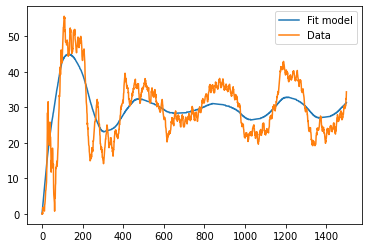

In [3]:
#um, ym = import_csv('data/yellow_feet_coll.csv')
um,ym = import_csv('data/yellow_feet_imco.csv')
#um, ym = import_csv('data/yellow_surf_imco.csv')
#um, ym = import_csv('data/flex_jt_imco.csv')

# 2nd-order model
#x0 = ca.MX.zeros(2,1)
#p0 = [9.89975e+2, 9.89975e+2, 9.89975e+4, 1487.9, 18.03817, 275.8104, 2729.28]
#y, _ = G_x_to_f.simulate(um, x0, dt=0.001)

# 4th-order model
x0 = ca.MX.zeros(4,1)
p0 = [18749.5, 10.295, 1609.45, 24888.4, 81.492, 100, 718633]
y, _ = G_x_to_f2.simulate(um, x0, dt=0.001)

opts = {'ipopt.tol': 1e-10}
nlp = {'x':ca.vertcat(*p), 'f':ca.sumsqr(ca.vertcat(*y)-ym)}
solver = ca.nlpsol('solver','ipopt', nlp, opts)
soln = solver(x0 = p0, lbx = -1e4, ubx = 1e10)
y_eval = ca.Function('y_eval', [ca.vertcat(*p)], y)

print(soln['x'])
y_num = y_eval(soln['x'])
plt.figure()
plt.plot(y_num, label='Fit model')
plt.plot(ym, label='Data')
plt.legend()
## plt.show()

In [126]:
def fit_2nd_order(x,f):
    x0 = ca.MX.zeros(2,1)
    p0 = [2.5e+09, 2.5e+09, 2.5001e+09, 240329, 4.22683, 586.766, 38319.4]
    y, _ = G_x_to_f.simulate(x, x0, dt=0.001)

    opts = {'ipopt.tol': 1e-12, 'ipopt.print_level': 0}
    nlp = {'x':ca.vertcat(*p), 'f':ca.sumsqr(ca.vertcat(*y)-f)}
    solver = ca.nlpsol('solver','ipopt', nlp, opts)
    soln = solver(x0 = p0, lbx = -1e4, ubx = 1e10)
    y_eval = ca.Function('y_eval', [ca.vertcat(*p)], y)
    y_num = y_eval(soln['x'])
    y_num = np.squeeze(np.array([y_n.full() for y_n in y_num]))
    
    
    return soln['x'], y_num

def fit_4th_order(x,f):
    x0 = ca.MX.zeros(4,1)
    p0 = [1749.5, 10.295, 1609.45, 2488.4, 8.492, 100, 7633]
    y, _ = G_x_to_f2.simulate(x, x0, dt=0.001)

    opts = {'ipopt.tol': 1e-10, 'ipopt.print_level': 0}
    nlp = {'x':ca.vertcat(*p), 'f':ca.sumsqr(ca.vertcat(*y)-f)}
    solver = ca.nlpsol('solver','ipopt', nlp, opts)
    soln = solver(x0 = p0, lbx = -1e4, ubx = 1e10)
    y_eval = ca.Function('y_eval', [ca.vertcat(*p)], y)
    y_num = y_eval(soln['x'])
    y_num = np.squeeze(np.array([y_n.full() for y_n in y_num]))
    
    # could calculate the info gain here? might be easier...
    
    return soln['x'], y_num

def info_gain_2nd_order(p0):
    from riccati_solver import RiccatiSolver
    q = ca.MX.sym('q')
    k1 = ca.MX.sym('k1')
    m2 = ca.MX.sym('m2')
    b2 = ca.MX.sym('b2')
    k2 = ca.MX.sym('k2')
    p = [q, k1, m2, b2, k2]
    dt = 0.001
    sigma_f = 0.45
    sigma_w = np.array([[0, 0],[0, 2]])

    mu = [0, k1*q]
    sigma_fu = [sigma_f, sigma_f]
    b = [0.5, 0.5]
    ig_fu = inf_gain(b, mu, sigma_fu)
    ig_fu_f = ca.Function('ig', p, [ig_fu])
    ig_fu_jac = ca.Function('ig_jac', p, [ca.jacobian(ig_fu, ca.vertcat(*p))])

    A = ca.MX.zeros(2,2)
    A[0,0] = 1
    A[0,1] = dt
    A[1,0] = -(k1+k2)/m2*dt
    A[1,1] = 1-b2/m2*dt
    C = ca.MX.zeros(1,2)
    C[0,0] = k1
    are_solv = RiccatiSolver('ric', 2,1)
    P = are_solv(A.T, C.T, sigma_w/m2**2, sigma_f)

    mu_pa = [0, k1*q]
    sigma_pa = [sigma_f, sigma_f+k1**2*P[0,0]]
    ig_pa = inf_gain([0.5, 0.5], mu, sigma_pa)
    ig_pa_f = ca.Function('ig', p, [ig_pa])
    ig_pa_jac = ca.Function('ig_jac', p, [ca.jacobian(ig_pa, ca.vertcat(*p))])
    return ig_pa_f(*p0), ig_pa_jac(*p0)

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   9.98ms (161.02us)  10.34ms (166.76us)        62
  nlp_grad_f  |  16.03ms (457.89us)  16.33ms (466.55us)        35
  nlp_hess_l  | 107.76ms (  3.27ms) 110.68ms (  3.35ms)        33
       total  | 153.86ms (153.86ms) 157.65ms (157.65ms)         1
[5e+09, 5e+09, 5e+09, 56821.6, 2.3356, 1306.85, 174930]
Info gain: [[0.53956842]]
Contact t: 0.003


<Figure size 2400x1600 with 0 Axes>

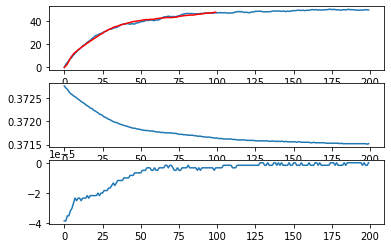

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  20.21ms (187.15us)  20.93ms (193.80us)       108
  nlp_grad_f  |  25.45ms (471.22us)  31.75ms (587.89us)        54
  nlp_hess_l  | 199.72ms (  3.84ms) 210.53ms (  4.05ms)        52
       total  | 281.46ms (281.46ms) 299.35ms (299.35ms)         1
[5e+09, 5e+09, 5e+09, 48557.9, 7.25023, 2517.23, 247652]
Info gain: [[0.50259465]]
Contact t: 0.007


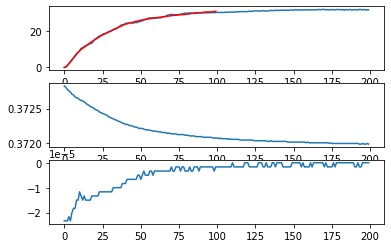

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   3.02ms (251.92us)   3.06ms (255.17us)        12
  nlp_grad_f  |   7.01ms (539.46us)   7.06ms (543.28us)        13
  nlp_hess_l  |  47.61ms (  4.33ms)  47.70ms (  4.34ms)        11
       total  |  65.26ms ( 65.26ms)  65.36ms ( 65.36ms)         1
[2.8243e+09, 2.8243e+09, 2.82439e+09, 212286, 4.51706, 820.462, 47080.6]
Info gain: [[0.53972077]]
Contact t: 0.003


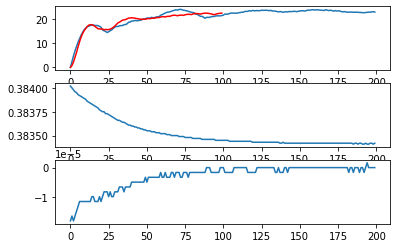

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   9.25ms (220.33us)   9.28ms (221.02us)        42
  nlp_grad_f  |  12.14ms (527.70us)  12.38ms (538.19us)        23
  nlp_hess_l  |  87.68ms (  4.18ms)  88.48ms (  4.21ms)        21
       total  | 129.55ms (129.55ms) 134.29ms (134.29ms)         1
[5e+09, 5e+09, 5e+09, 75315.6, 2.85482, 280.717, 26390.5]
Info gain: [[0.53970894]]
Contact t: 0.006


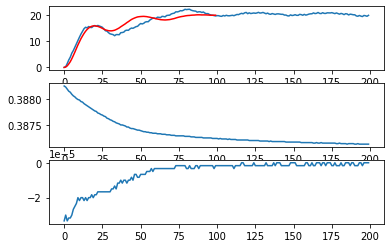

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   3.19ms (228.00us)   3.72ms (265.41us)        14
  nlp_grad_f  |   7.80ms (519.87us)   8.01ms (533.84us)        15
  nlp_hess_l  |  52.93ms (  4.07ms)  55.04ms (  4.23ms)        13
       total  |  73.18ms ( 73.18ms)  76.20ms ( 76.20ms)         1
[2.78503e+09, 2.78503e+09, 2.78512e+09, 250474, 4.37645, 616.981, 36547.6]
Info gain: [[0.53972077]]
Contact t: 0.002


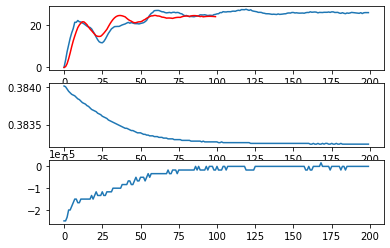

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   8.56ms (199.14us)   8.66ms (201.44us)        43
  nlp_grad_f  |   8.49ms (499.18us)   9.31ms (547.70us)        17
  nlp_hess_l  |  58.65ms (  3.91ms)  59.24ms (  3.95ms)        15
       total  |  87.85ms ( 87.85ms)  89.18ms ( 89.18ms)         1
[5e+09, 5e+09, 5e+09, 53297.1, 2.60041, 478.821, 47154.2]
Info gain: [[0.46270299]]
Contact t: 0.008


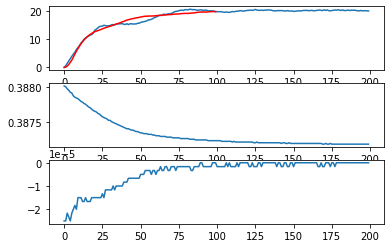

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   9.88ms (193.80us)   9.92ms (194.55us)        51
  nlp_grad_f  |  17.94ms (484.81us)  18.12ms (489.77us)        37
  nlp_hess_l  | 128.20ms (  3.66ms) 128.76ms (  3.68ms)        35
       total  | 179.76ms (179.76ms) 180.53ms (180.53ms)         1
[5e+09, 5e+09, 5e+09, 51126.7, 1.81275, 195.493, 21060.1]
Info gain: [[0.53437027]]
Contact t: 0.009


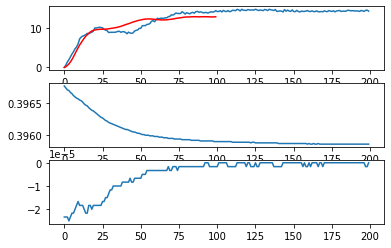

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  11.79ms (196.50us)  11.89ms (198.13us)        60
  nlp_grad_f  |  12.91ms (496.65us)  13.13ms (505.04us)        26
  nlp_hess_l  |  91.30ms (  3.80ms)  94.03ms (  3.92ms)        24
       total  | 135.44ms (135.44ms) 138.21ms (138.21ms)         1
[5e+09, 5e+09, 5e+09, 60496.9, 1.27249, 141.562, 15991.6]
Info gain: [[0.53972077]]
Contact t: 0.002


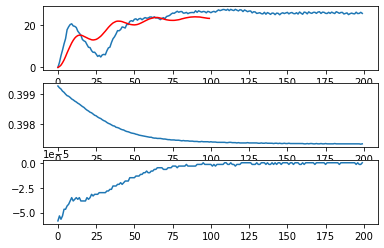

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   8.36ms (177.94us)   8.38ms (178.35us)        47
  nlp_grad_f  |  12.78ms (456.50us)  12.83ms (458.32us)        28
  nlp_hess_l  |  98.09ms (  3.77ms)  98.53ms (  3.79ms)        26
       total  | 136.21ms (136.21ms) 136.48ms (136.48ms)         1
[5e+09, 5e+09, 5e+09, 57998.1, 4.88522, 2224.63, 200844]
Info gain: [[0.36911619]]
Contact t: 0.008


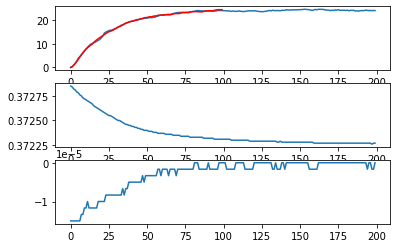

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  10.98ms (219.64us)  13.02ms (260.35us)        50
  nlp_grad_f  |  20.01ms (555.81us)  22.85ms (634.85us)        36
  nlp_hess_l  | 148.33ms (  4.36ms) 171.36ms (  5.04ms)        34
       total  | 207.57ms (207.57ms) 235.11ms (235.11ms)         1
[5.01961e+09, 5.01961e+09, 5.01961e+09, 63030.1, 1.71434, 200.705, 17784.7]
Info gain: [[0.53972075]]
Contact t: 0.003


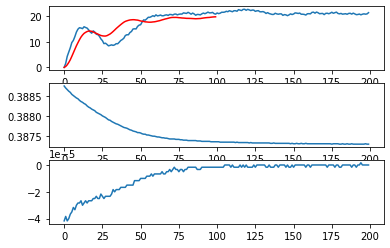

CasADi - 2021-09-11 19:39:57 WARNING("solver:nlp_f failed: Inf detected for output f, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  20.57ms (241.98us)  22.29ms (262.28us)        85
  nlp_grad_f  |  28.00ms (500.07us)  30.88ms (551.40us)        56
  nlp_hess_l  | 184.15ms (  3.41ms) 189.87ms (  3.52ms)        54
       total  | 272.27ms (272.27ms) 287.16ms (287.16ms)         1
[5e+09, 5e+09, 5e+09, 49093.6, 2.55443, 257.063, 21176.5]
Info gain: [[0.50515234]]
Contact t: 0.008


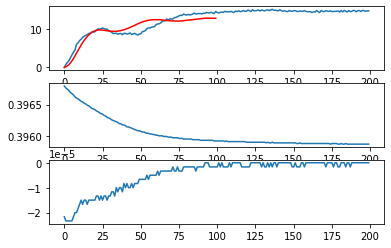

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  18.01ms (185.63us)  18.03ms (185.90us)        97
  nlp_grad_f  |  37.82ms (484.82us)  40.57ms (520.09us)        78
  nlp_hess_l  | 274.37ms (  3.61ms) 288.43ms (  3.80ms)        76
       total  | 378.62ms (378.62ms) 395.48ms (395.48ms)         1
[5e+09, 5e+09, 5e+09, 36199.8, 1.35696, 194.474, 27895.9]
Info gain: [[0.38956105]]
Contact t: 0.009


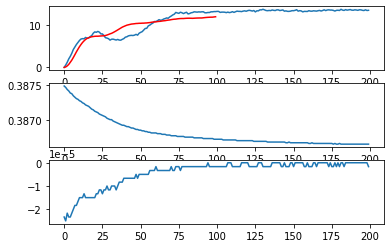

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  27.14ms (220.65us)  27.88ms (226.69us)       123
  nlp_grad_f  |  41.41ms (524.13us)  44.92ms (568.60us)        79
  nlp_hess_l  | 298.65ms (  3.88ms) 331.52ms (  4.31ms)        77
       total  | 426.36ms (426.36ms) 469.41ms (469.41ms)         1
[5e+09, 5e+09, 5e+09, 39679.4, 8.78242, 4343.05, 363701]
Info gain: [[0.31920731]]
Contact t: 0.008


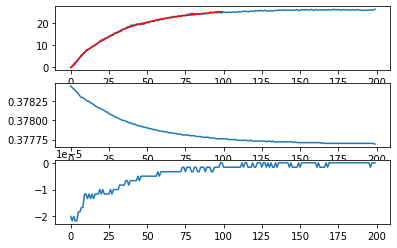

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   9.07ms (201.49us)   9.47ms (210.50us)        45
  nlp_grad_f  |  12.90ms (496.35us)  13.13ms (505.12us)        26
  nlp_hess_l  |  88.09ms (  3.67ms)  90.40ms (  3.77ms)        24
       total  | 127.97ms (127.97ms) 131.89ms (131.89ms)         1
[5e+09, 5e+09, 5e+09, 32869.5, 0.820572, 284.91, 41528.7]
Info gain: [[0.21564271]]
Contact t: 0.011


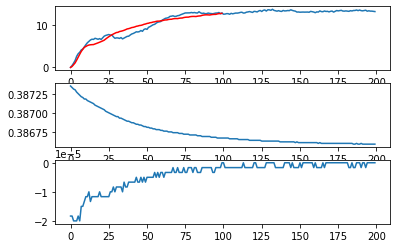

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  17.46ms (286.16us)  19.19ms (314.64us)        61
  nlp_grad_f  |  17.55ms (501.49us)  17.70ms (505.82us)        35
  nlp_hess_l  | 155.88ms (  4.72ms) 189.20ms (  5.73ms)        33
       total  | 220.80ms (220.80ms) 256.17ms (256.17ms)         1
[5e+09, 5e+09, 5e+09, 64951.7, 4.65951, 286.08, 24850.9]
Info gain: [[0.51647488]]
Contact t: 0.01


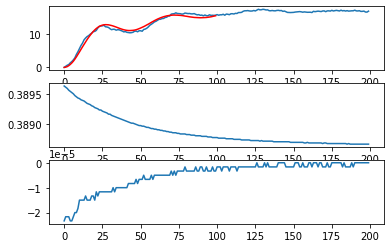

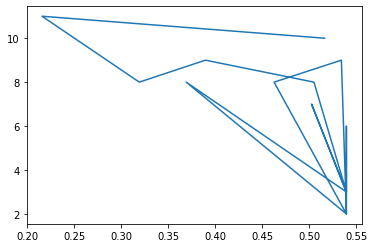

In [129]:
# Fit model and calc IG for a collection of data
import glob
import csv
files = glob.glob('data/vertical_table/*.txt')
plt.figure(dpi=400)

igs = []
con_dets = []
for file in files:
    x, f, v, st = import_txt(file)
    if st > 0:
        contact_detected = np.argwhere(f>5.5)
        contact_det = contact_detected[contact_detected>st][0]-st
        
        fig, axs = plt.subplots(3)
        axs[0].plot(f[st:st+200])
        axs[1].plot(x[st:st+200])
        axs[2].plot(v[st:st+200])
        
        params, f_fit = fit_2nd_order(x[st]-x[st:st+100],f[st:st+100])
        axs[0].plot(f_fit,'r')
        print(params)
        
        p0 = [p.full() for p in ca.vertsplit(params[3:])]
        ig, ig_jac = info_gain_2nd_order(np.append(x[st+2]-x[st], p0))
        igs.append(ig)
        con_dets.append(contact_det)
        print('Info gain: {}'.format(ig.full()))
        print('Contact t: {}'.format(contact_det/1000.0))
        plt.show()
plt.figure()
plt.plot(igs, con_dets, 'o')
plt.show()
